In [39]:
#import packages 
import numpy as np
import pandas as pd
from tensorflow import keras 

In [40]:
#import data 
path = 'data/testing set/'
data_1 = pd.read_csv(path + '20180917 - 0003 - jglad - sitting_chewing.csv').values
data_2 = pd.read_csv(path + '20180917 - 0001 - jglad - sitting.csv').values
data_3 = pd.read_csv(path + 'Walking_chewing_2.csv').values


In [41]:
#loading weights
#load the saved model 
str = 'SittingChewing_Walking'
json_file = open(str + '.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights(str + '.h5')



In [42]:
data_1


array([[ -112, -4176,  -224,  4184],
       [  112, -4176,  -208,  4183],
       [ -128, -4176,  -224,  4184],
       ...,
       [ -560,   -32,  3712,  3754],
       [ -624,  -112,  3744,  3797],
       [ -624,   -96,  3712,  3765]], dtype=int64)

In [43]:
#get velocity 
vel_1 = np.diff(data_1,axis=0)
vel_2 = np.diff(data_2,axis=0)
vel_3 = np.diff(data_3,axis=0)

In [44]:
vel_1

array([[ 224,    0,   16,   -1],
       [-240,    0,  -16,    1],
       [ 208,    0,   16,   -2],
       ...,
       [  80, -144, -224, -235],
       [ -64,  -80,   32,   43],
       [   0,   16,  -32,  -32]], dtype=int64)

In [45]:
data_1 = np.hstack([data_1[:len(data_1)-1,:],vel_1])
data_2 = np.hstack([data_2[:len(data_2)-1,:],vel_2])
data_3 = np.hstack([data_3[:len(data_3)-1,:],vel_3])

In [72]:
a = loaded_model.predict_classes(data_1)


In [73]:
b = loaded_model.predict_classes(data_2)

In [74]:
c = loaded_model.predict_classes(data_3)

In [75]:
#plotting the curves 
import matplotlib.pyplot as plt


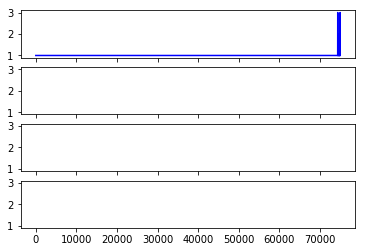

In [79]:
#
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,sharex = True, sharey = True)

ax1.plot(a,color = 'b')



array([1.0059595e-08, 1.0059595e-08, 1.0059595e-08, ..., 1.7714204e-03,
       1.7714204e-03, 1.7714204e-03], dtype=float32)